# Import Needed Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading the data¶


In [2]:
df= pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.shape

(418, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.isna().sum()

In [9]:
new_df = df.copy()

<Axes: >

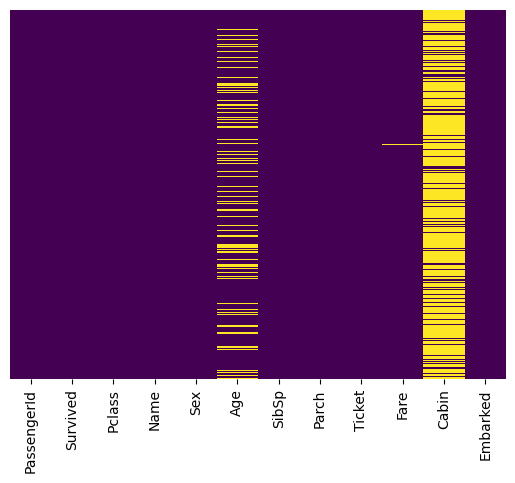

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

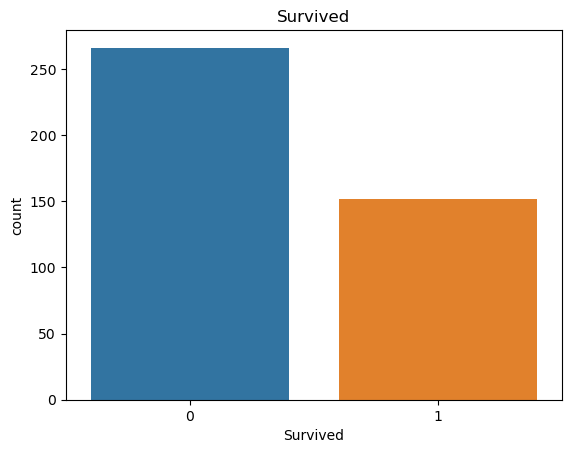

In [13]:
sns.countplot(x=df['Survived'])
plt.title('Survived');

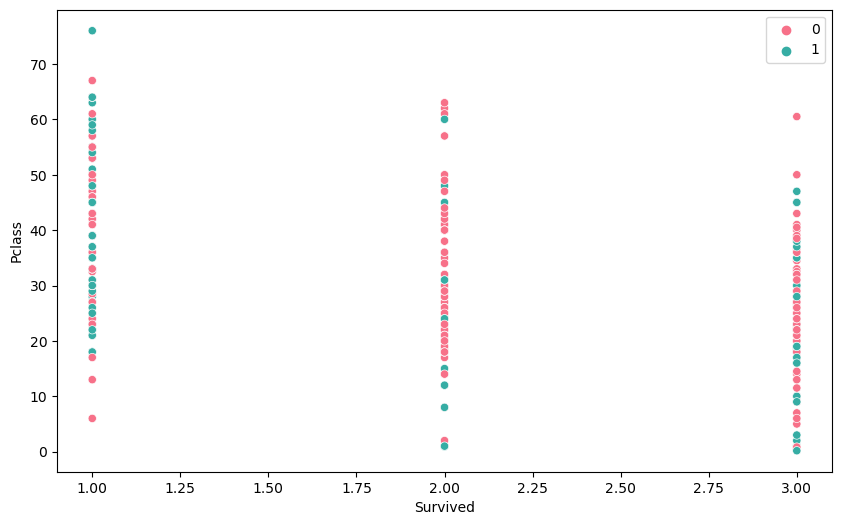

In [14]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y=df["Age"] , x=df["Pclass"] ,hue=df["Survived"] ,palette="husl")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.legend()

<Axes: xlabel='Survived', ylabel='count'>

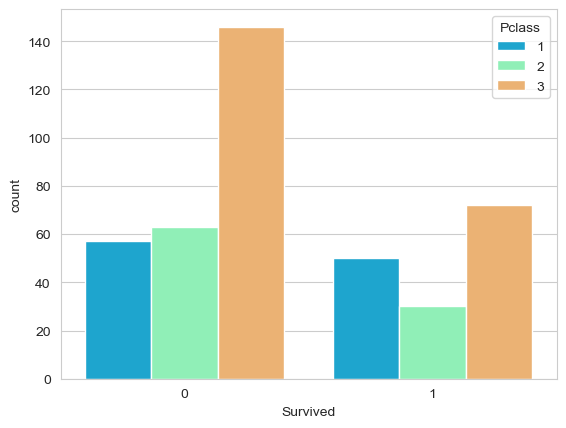

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: title={'center': 'passenger on the titanic '}, xlabel='Sex'>

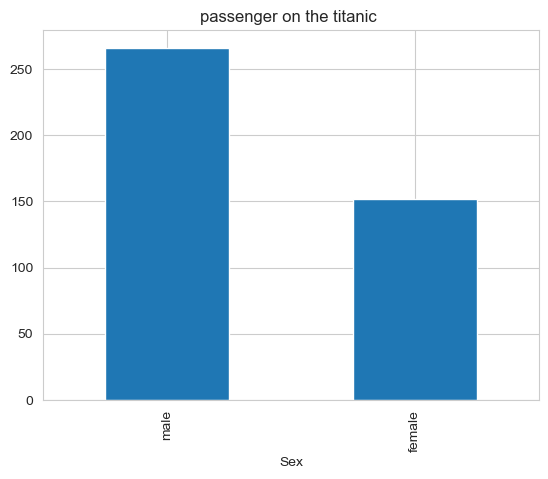

In [16]:
df['Sex']. value_counts().plot.bar(title="passenger on the titanic ")

<Axes: >

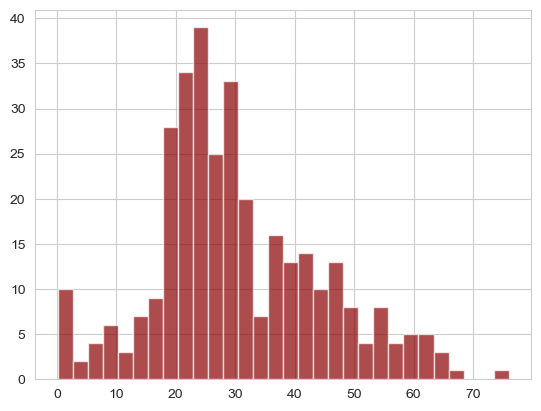

In [17]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

# we will predict depend on pclass , sex , age , fare

In [18]:
df.drop('Cabin',axis=1,inplace=True)
df= df.dropna(subset=['Fare', 'Age'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 31.0+ KB


In [20]:
X=df[["Pclass" , "Sex" , "Age" , "Fare"]]  ## untarget variable
y=df["Survived"] ### target variable

In [21]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])
X

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
409,3,0,3.0,13.7750
411,1,0,37.0,90.0000
412,3,0,28.0,7.7750
414,1,0,39.0,108.9000


In [23]:
X['Sex'].unique()

array([1, 0])

In [24]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [25]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

# ML models

In [27]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=1500)
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [28]:
LR_model.score(X_train,y_train)

1.0

In [29]:
LR_pred = LR_model.predict(X_test)

In [30]:
LR_acc=accuracy_score(y_test,LR_pred)

In [31]:
print(LR_acc)

1.0


In [32]:
print(classification_report(y_test , LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Text(97.72222222222221, 0.5, 'Truh')

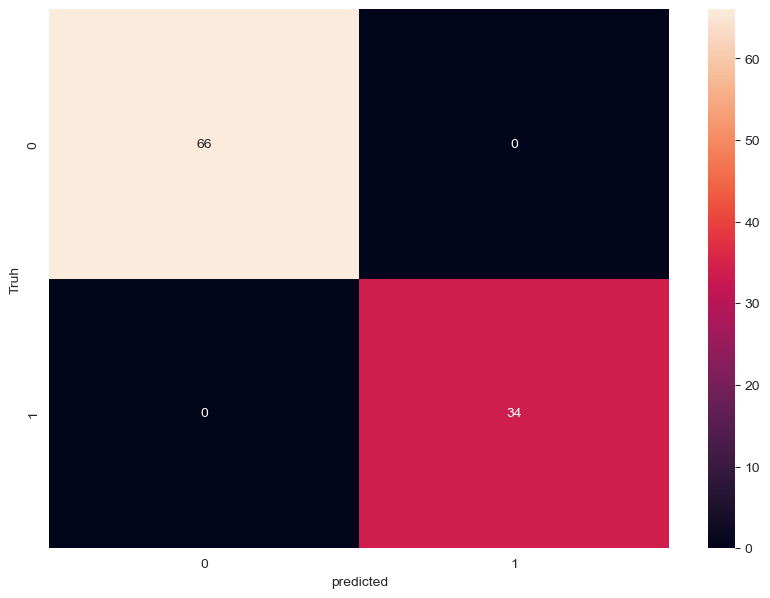

In [33]:
cm1 = confusion_matrix(y_test,LR_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [34]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
DT_model.score(X_test , y_test)

1.0

In [36]:
DT_pred=DT_model.predict(X_test)

In [37]:
DT_acc = accuracy_score(y_test ,DT_pred )

In [38]:
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Text(97.72222222222221, 0.5, 'Truh')

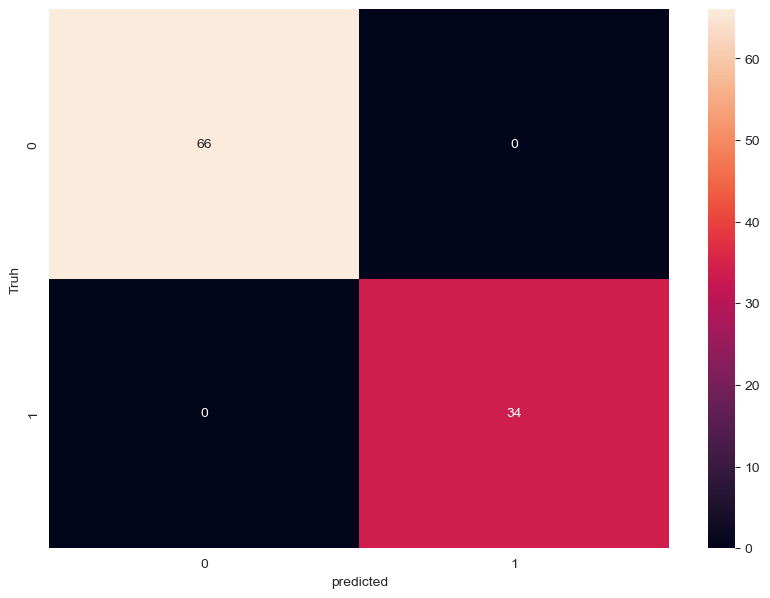

In [39]:
cm2 = confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [40]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [41]:
RF_model = RandomForestClassifier(n_estimators= 100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [42]:
RF_model.score(X_train , y_train)

1.0

In [43]:
RF_pred = RF_model.predict(X_test)

In [44]:
 RF_acc= accuracy_score(y_test , RF_pred)   

In [45]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Text(97.72222222222221, 0.5, 'Truh')

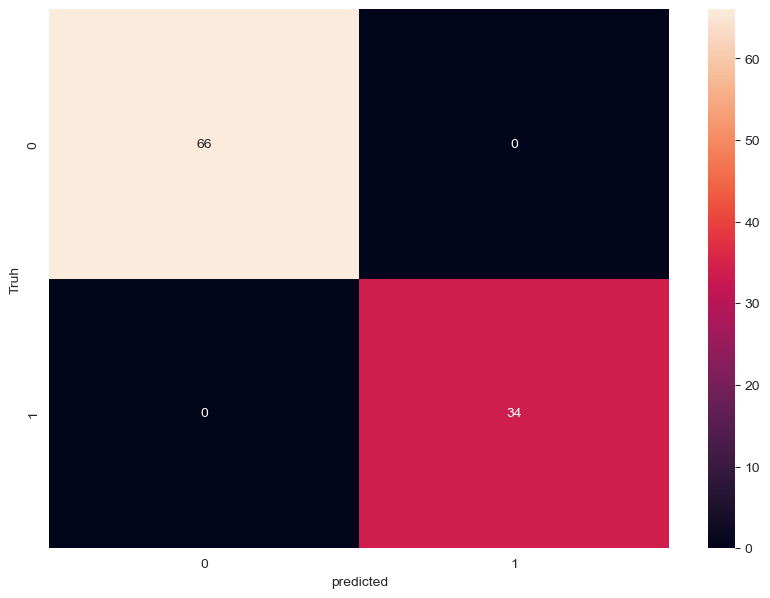

In [46]:
cm3 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Models scores

In [47]:
models=pd.DataFrame({
    'models':['Logistic_Regression','Random_forest','Decsion_Treee'],
    'scores':[LR_acc,RF_acc,DT_acc]})
models.sort_values(by='scores',ascending=False)

,models,scores
0,Logistic_Regression,1.0
1,Random_forest,1.0
2,Decsion_Treee,1.0


### FEATURE ENGINEERING PROCESS

In [48]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
new_df = new_df.drop("Name",axis = 1)

In [50]:
new_df.drop(['PassengerId','Ticket'],axis = 1, inplace = True)

In [51]:
new_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


### AGE COLUMN

In [59]:
mean_age = new_df["Age"].mean()
mean_age

30.19138755980861

In [62]:
new_df["Age"] = new_df["Age"].fillna(new_df["Age"].mean())

In [60]:
new_df['Age'] = new_df['Age'].fillna(mean_age).astype("int64")

In [61]:
new_df['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int64

### SEX COLUMN

In [64]:
new_df['Sex'] = new_df['Sex'].map({"Female":0,"male":1})

In [75]:
new_df['Sex'] = new_df['Sex'].fillna(new_df["Sex"].median()).astype("int64")

### EMBARKED COLUMN

In [65]:
new_df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [69]:
le = LabelEncoder()
new_df['Embarked'] = le.fit_transform(new_df['Embarked'])

In [70]:
new_df['Embarked'].unique()

array([1, 2, 0])

In [78]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 24.6 KB


In [96]:
new_df['Fare'] = new_df['Fare'].fillna(new_df['Fare'].mean())

In [97]:
new_df.drop("Cabin",axis = 1, inplace = True)

KeyError: "['Cabin'] not found in axis"

In [98]:
X = new_df.drop("Survived",axis = 1)
y = new_df['Survived']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
rfc = RandomForestClassifier(n_estimators = 100)

In [101]:
model = rfc.fit(X_train,y_train)

In [102]:
y_pred = model.predict(X_test)

In [103]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1], dtype=int64)

In [104]:
print(accuracy_score(y_test,y_pred))

0.5942028985507246


### TUNING HYPERPARAMETERS FOR THE RANDOM FOREST CLASSIFIER

In [106]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Evaluate the model
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {rf_random.best_params_}")
print(f"Accuracy: {accuracy}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Accuracy: 0.5869565217391305
